In [58]:
# read the parquet file containing all (normalized) metrics
import polars.selectors as cs
import polars as pl
import plotly as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display, HTML, clear_output
from dash import Dash, dcc, html, Input, Output, callback, jupyter_dash, State, no_update
from dash.exceptions import PreventUpdate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import io
from PyPDF2 import PdfMerger
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [2]:
parquet_path = "./parquet4visual.parquet"

In [3]:
df = pl.read_parquet(parquet_path)

In [4]:
pl.Config.set_tbl_cols(250)
df.head

<bound method DataFrame.head of shape: (449_537, 232)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬───

In [5]:
pca_df_list = []

In [6]:
#keep only relevant columns for pca
for coln in df.columns:
    if coln in  ['PSV-99', 'position_grouped', 'competition_region_division'] or 'P90' in coln:
        pca_df_list.append(df.select(coln))
    else:
        continue

In [7]:
pca_df = pl.concat(pca_df_list, how="horizontal")

In [8]:
pca_df.head()

P90 Count HSR,P90 Count HSR 1,P90 Count HSR 2,P90 Count HSR OTIP,P90 Count HSR OTIP 1,P90 Count HSR OTIP 2,P90 Count HSR TIP,P90 Count HSR TIP 1,P90 Count HSR TIP 2,P90 Count High Acceleration,P90 Count High Acceleration 1,P90 Count High Acceleration 2,P90 Count High Acceleration OTIP,P90 Count High Acceleration OTIP 1,P90 Count High Acceleration OTIP 2,P90 Count High Acceleration TIP,P90 Count High Acceleration TIP 1,P90 Count High Acceleration TIP 2,P90 Count High Deceleration,P90 Count High Deceleration 1,P90 Count High Deceleration 2,P90 Count High Deceleration OTIP,P90 Count High Deceleration OTIP 1,P90 Count High Deceleration OTIP 2,P90 Count High Deceleration TIP,P90 Count High Deceleration TIP 1,P90 Count High Deceleration TIP 2,P90 Count Medium Acceleration,P90 Count Medium Acceleration 1,P90 Count Medium Acceleration 2,P90 Count Medium Acceleration OTIP,P90 Count Medium Acceleration OTIP 1,P90 Count Medium Acceleration OTIP 2,P90 Count Medium Acceleration TIP,P90 Count Medium Acceleration TIP 1,P90 Count Medium Acceleration TIP 2,P90 Count Medium Deceleration,P90 Count Medium Deceleration 1,P90 Count Medium Deceleration 2,P90 Count Medium Deceleration OTIP,P90 Count Medium Deceleration OTIP 1,P90 Count Medium Deceleration OTIP 2,P90 Count Medium Deceleration TIP,P90 Count Medium Deceleration TIP 1,P90 Count Medium Deceleration TIP 2,P90 Count Sprint,P90 Count Sprint 1,P90 Count Sprint 2,P90 Count Sprint OTIP,P90 Count Sprint OTIP 1,P90 Count Sprint OTIP 2,P90 Count Sprint TIP,P90 Count Sprint TIP 1,P90 Count Sprint TIP 2,P90 Distance,P90 Distance 1,P90 Distance 2,P90 Distance OTIP,P90 Distance OTIP 1,P90 Distance OTIP 2,P90 Distance TIP,P90 Distance TIP 1,P90 Distance TIP 2,P90 HSR Distance,P90 HSR Distance 1,P90 HSR Distance 2,P90 HSR Distance OTIP,P90 HSR Distance OTIP 1,P90 HSR Distance OTIP 2,P90 HSR Distance TIP,P90 HSR Distance TIP 1,P90 HSR Distance TIP 2,P90 Minutes,P90 Minutes 1,P90 Minutes 2,P90 Minutes OTIP,P90 Minutes OTIP 1,P90 Minutes OTIP 2,P90 Minutes TIP,P90 Minutes TIP 1,P90 Minutes TIP 2,P90 Running Distance,P90 Running Distance 1,P90 Running Distance 2,P90 Running Distance OTIP,P90 Running Distance OTIP 1,P90 Running Distance OTIP 2,P90 Running Distance TIP,P90 Running Distance TIP 1,P90 Running Distance TIP 2,P90 Sprinting Distance,P90 Sprinting Distance 1,P90 Sprinting Distance 2,P90 Sprinting Distance OTIP,P90 Sprinting Distance OTIP 1,P90 Sprinting Distance OTIP 2,P90 Sprinting Distance TIP,P90 Sprinting Distance TIP 1,P90 Sprinting Distance TIP 2,P90 competition.id,P90 season.end_year,P90 season.id,P90 season.start_year,PSV-99,competition_region_division,position_grouped
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
54.951878,62.990456,47.291835,86.027551,83.743842,88.439306,70.63197,89.108911,48.736462,3.725551,5.726405,1.818917,0.0,0.0,0.0,0.0,0.0,0.0,10.245265,15.270414,5.45675,10.120888,14.778325,5.202312,11.152416,13.709063,8.122744,93.138777,99.257688,87.308003,118.920439,118.226601,119.653179,81.784387,82.254379,81.227437,82.893511,80.169671,85.489086,86.027551,83.743842,88.439306,63.197026,54.836253,73.104693,4.656939,5.726405,3.637833,5.060444,4.926108,5.202312,7.434944,6.854532,8.122744,12132.257063,12998.939555,11306.386419,14490.581951,14694.581281,14275.144509,12758.364312,12845.392232,12655.234657,693.883887,738.706257,651.172191,1120.888389,1108.374384,1134.104046,966.542751,952.779893,982.851986,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,2249.301459,2584.517497,1929.870655,3805.454034,4147.783251,3443.930636,2457.249071,2529.322163,2371.841155,137.84539,175.609756,101.859337,113.859994,133.004926,93.6416

In [9]:
# manually remove leftover irelevant columns
pca_df.drop([
    'P90 Minutes',
    'P90 Minutes 1',
    'P90 Minutes 2',
    'P90 Minutes OTIP',
    'P90 Minutes OTIP 1',
    'P90 Minutes OTIP 2',
    'P90 Minutes TIP',
    'P90 Minutes TIP 1',
    'P90 Minutes TIP 2',
    'P90 competition.id',
    'P90 season.end_year',
    'P90 season.id',
    'P90 season.start_year'
])

P90 Count HSR,P90 Count HSR 1,P90 Count HSR 2,P90 Count HSR OTIP,P90 Count HSR OTIP 1,P90 Count HSR OTIP 2,P90 Count HSR TIP,P90 Count HSR TIP 1,P90 Count HSR TIP 2,P90 Count High Acceleration,P90 Count High Acceleration 1,P90 Count High Acceleration 2,P90 Count High Acceleration OTIP,P90 Count High Acceleration OTIP 1,P90 Count High Acceleration OTIP 2,P90 Count High Acceleration TIP,P90 Count High Acceleration TIP 1,P90 Count High Acceleration TIP 2,P90 Count High Deceleration,P90 Count High Deceleration 1,P90 Count High Deceleration 2,P90 Count High Deceleration OTIP,P90 Count High Deceleration OTIP 1,P90 Count High Deceleration OTIP 2,P90 Count High Deceleration TIP,P90 Count High Deceleration TIP 1,P90 Count High Deceleration TIP 2,P90 Count Medium Acceleration,P90 Count Medium Acceleration 1,P90 Count Medium Acceleration 2,P90 Count Medium Acceleration OTIP,P90 Count Medium Acceleration OTIP 1,P90 Count Medium Acceleration OTIP 2,P90 Count Medium Acceleration TIP,P90 Count Medium Acceleration TIP 1,P90 Count Medium Acceleration TIP 2,P90 Count Medium Deceleration,P90 Count Medium Deceleration 1,P90 Count Medium Deceleration 2,P90 Count Medium Deceleration OTIP,P90 Count Medium Deceleration OTIP 1,P90 Count Medium Deceleration OTIP 2,P90 Count Medium Deceleration TIP,P90 Count Medium Deceleration TIP 1,P90 Count Medium Deceleration TIP 2,P90 Count Sprint,P90 Count Sprint 1,P90 Count Sprint 2,P90 Count Sprint OTIP,P90 Count Sprint OTIP 1,P90 Count Sprint OTIP 2,P90 Count Sprint TIP,P90 Count Sprint TIP 1,P90 Count Sprint TIP 2,P90 Distance,P90 Distance 1,P90 Distance 2,P90 Distance OTIP,P90 Distance OTIP 1,P90 Distance OTIP 2,P90 Distance TIP,P90 Distance TIP 1,P90 Distance TIP 2,P90 HSR Distance,P90 HSR Distance 1,P90 HSR Distance 2,P90 HSR Distance OTIP,P90 HSR Distance OTIP 1,P90 HSR Distance OTIP 2,P90 HSR Distance TIP,P90 HSR Distance TIP 1,P90 HSR Distance TIP 2,P90 Running Distance,P90 Running Distance 1,P90 Running Distance 2,P90 Running Distance OTIP,P90 Running Distance OTIP 1,P90 Running Distance OTIP 2,P90 Running Distance TIP,P90 Running Distance TIP 1,P90 Running Distance TIP 2,P90 Sprinting Distance,P90 Sprinting Distance 1,P90 Sprinting Distance 2,P90 Sprinting Distance OTIP,P90 Sprinting Distance OTIP 1,P90 Sprinting Distance OTIP 2,P90 Sprinting Distance TIP,P90 Sprinting Distance TIP 1,P90 Sprinting Distance TIP 2,PSV-99,competition_region_division,position_grouped
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
54.951878,62.990456,47.291835,86.027551,83.743842,88.439306,70.63197,89.108911,48.736462,3.725551,5.726405,1.818917,0.0,0.0,0.0,0.0,0.0,0.0,10.245265,15.270414,5.45675,10.120888,14.778325,5.202312,11.152416,13.709063,8.122744,93.138777,99.257688,87.308003,118.920439,118.226601,119.653179,81.784387,82.254379,81.227437,82.893511,80.169671,85.489086,86.027551,83.743842,88.439306,63.197026,54.836253,73.104693,4.656939,5.726405,3.637833,5.060444,4.926108,5.202312,7.434944,6.854532,8.122744,12132.257063,12998.939555,11306.386419,14490.581951,14694.581281,14275.144509,12758.364312,12845.392232,12655.234657,693.883887,738.706257,651.172191,1120.888389,1108.374384,1134.104046,966.542751,952.779893,982.851986,2249.301459,2584.517497,1929.870655,3805.454034,4147.783251,3443.930636,2457.249071,2529.322163,2371.841155,137.84539,175.609756,101.859337,113.859994,133.004926,93.641618,111.524164,75.399848,154.33213,25.7,"""Belgium 1""","""AM"""
36.49028,39.028621,34.152187,51.706658,61.983471,41.80491,70.532915,61.363636,80.357143,4.678241,5.854293,3.594967,3.041568,0.0,5.97213,7.053292,6.818182,7.305195,7.485186,9.757155,5.392451,3.041568,6.198347,0.0,7.053292,6.818182,7.305195,72.044911,70.251

In [10]:
pca_df['position_grouped'].unique()

position_grouped
str
"""CB"""
"""DM"""
"""RW|LW"""
"""RF|LF"""
"""RCB|LCB"""
"""RWB|LWB"""
"""RM|LM"""
"""CF"""
"""AM"""


In [11]:
position_dfs = {}

In [12]:
# store a dataframe per position in a seperate dataframe, all dataframes stored together in a dictionary
# needed because positions have to be seperated for fair pca analysis
for position in pca_df['position_grouped'].unique():
    position_dfs[position] = pca_df.filter(
        pl.col('position_grouped') == position
    )

In [13]:
position_dfs.keys()

dict_keys(['AM', 'RWB|LWB', 'RW|LW', 'RF|LF', 'CF', 'DM', 'RCB|LCB', 'CB', 'RM|LM'])

In [14]:
# drop position_grouped column from the dataframes that will be used for the PCA analysis
for key, value in position_dfs.items():
    position_dfs[key] = value.drop('position_grouped')

In [21]:
# drop na values
position_dfs['CB'] = position_dfs['CB'].drop_nulls()

In [22]:
# test 1 dataframe to see if the data cleaning was done correctly
position_dfs['CB']

P90 Count HSR,P90 Count HSR 1,P90 Count HSR 2,P90 Count HSR OTIP,P90 Count HSR OTIP 1,P90 Count HSR OTIP 2,P90 Count HSR TIP,P90 Count HSR TIP 1,P90 Count HSR TIP 2,P90 Count High Acceleration,P90 Count High Acceleration 1,P90 Count High Acceleration 2,P90 Count High Acceleration OTIP,P90 Count High Acceleration OTIP 1,P90 Count High Acceleration OTIP 2,P90 Count High Acceleration TIP,P90 Count High Acceleration TIP 1,P90 Count High Acceleration TIP 2,P90 Count High Deceleration,P90 Count High Deceleration 1,P90 Count High Deceleration 2,P90 Count High Deceleration OTIP,P90 Count High Deceleration OTIP 1,P90 Count High Deceleration OTIP 2,P90 Count High Deceleration TIP,P90 Count High Deceleration TIP 1,P90 Count High Deceleration TIP 2,P90 Count Medium Acceleration,P90 Count Medium Acceleration 1,P90 Count Medium Acceleration 2,P90 Count Medium Acceleration OTIP,P90 Count Medium Acceleration OTIP 1,P90 Count Medium Acceleration OTIP 2,P90 Count Medium Acceleration TIP,P90 Count Medium Acceleration TIP 1,P90 Count Medium Acceleration TIP 2,P90 Count Medium Deceleration,P90 Count Medium Deceleration 1,P90 Count Medium Deceleration 2,P90 Count Medium Deceleration OTIP,P90 Count Medium Deceleration OTIP 1,P90 Count Medium Deceleration OTIP 2,P90 Count Medium Deceleration TIP,P90 Count Medium Deceleration TIP 1,P90 Count Medium Deceleration TIP 2,P90 Count Sprint,P90 Count Sprint 1,P90 Count Sprint 2,P90 Count Sprint OTIP,P90 Count Sprint OTIP 1,P90 Count Sprint OTIP 2,P90 Count Sprint TIP,P90 Count Sprint TIP 1,P90 Count Sprint TIP 2,P90 Distance,P90 Distance 1,P90 Distance 2,P90 Distance OTIP,P90 Distance OTIP 1,P90 Distance OTIP 2,P90 Distance TIP,P90 Distance TIP 1,P90 Distance TIP 2,P90 HSR Distance,P90 HSR Distance 1,P90 HSR Distance 2,P90 HSR Distance OTIP,P90 HSR Distance OTIP 1,P90 HSR Distance OTIP 2,P90 HSR Distance TIP,P90 HSR Distance TIP 1,P90 HSR Distance TIP 2,P90 Minutes,P90 Minutes 1,P90 Minutes 2,P90 Minutes OTIP,P90 Minutes OTIP 1,P90 Minutes OTIP 2,P90 Minutes TIP,P90 Minutes TIP 1,P90 Minutes TIP 2,P90 Running Distance,P90 Running Distance 1,P90 Running Distance 2,P90 Running Distance OTIP,P90 Running Distance OTIP 1,P90 Running Distance OTIP 2,P90 Running Distance TIP,P90 Running Distance TIP 1,P90 Running Distance TIP 2,P90 Sprinting Distance,P90 Sprinting Distance 1,P90 Sprinting Distance 2,P90 Sprinting Distance OTIP,P90 Sprinting Distance OTIP 1,P90 Sprinting Distance OTIP 2,P90 Sprinting Distance TIP,P90 Sprinting Distance TIP 1,P90 Sprinting Distance TIP 2,P90 competition.id,P90 season.end_year,P90 season.id,P90 season.start_year,PSV-99,competition_region_division
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
31.439433,38.11137,25.149701,72.3182,71.377073,73.502722,36.898994,42.481457,30.0,7.397514,9.527842,5.389222,10.84773,12.97765,8.166969,6.708908,6.06878,7.5,12.02096,17.150116,7.185629,10.84773,12.97765,8.166969,6.708908,6.06878,7.5,110.962704,116.239678,105.988024,151.86822,155.731795,147.005445,107.342527,103.169252,112.5,86.920785,81.939445,91.616766,101.24548,97.332372,106.170599,83.861349,72.825354,97.5,7.397514,7.622274,7.185629,18.07955,19.466474,16.333938,6.708908,6.06878,7.5,8903.832323,9722.210459,8132.335329,11690.237043,12075.702956,11205.08167,10740.96161,11020.903574,10395.0,423.507654,472.580987,377.245509,950.984331,895.457823,1020.871143,409.243384,479.433581,322.5,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,1035.651906,1200.508152,880.239521,1974.286862,2011.535689,1927.404719,1288.110324,1420.094403,1125.0,178.465016,182.934575,174.251497,339.89554,441.240087,212.341198,181.140514,60.687795,330.0,14.795027,1869

In [46]:
X = position_dfs['CB'].drop("competition_region_division")
y = position_dfs['CB']["competition_region_division"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

Scaling

In [28]:
#initialize the scaler
scaler=StandardScaler()

#use the scaler on the training features
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [29]:
#starting the pca
PCA_model = PCA(n_components=20)
PCA_model.fit(X_train_scaled)

PCA(n_components=20)

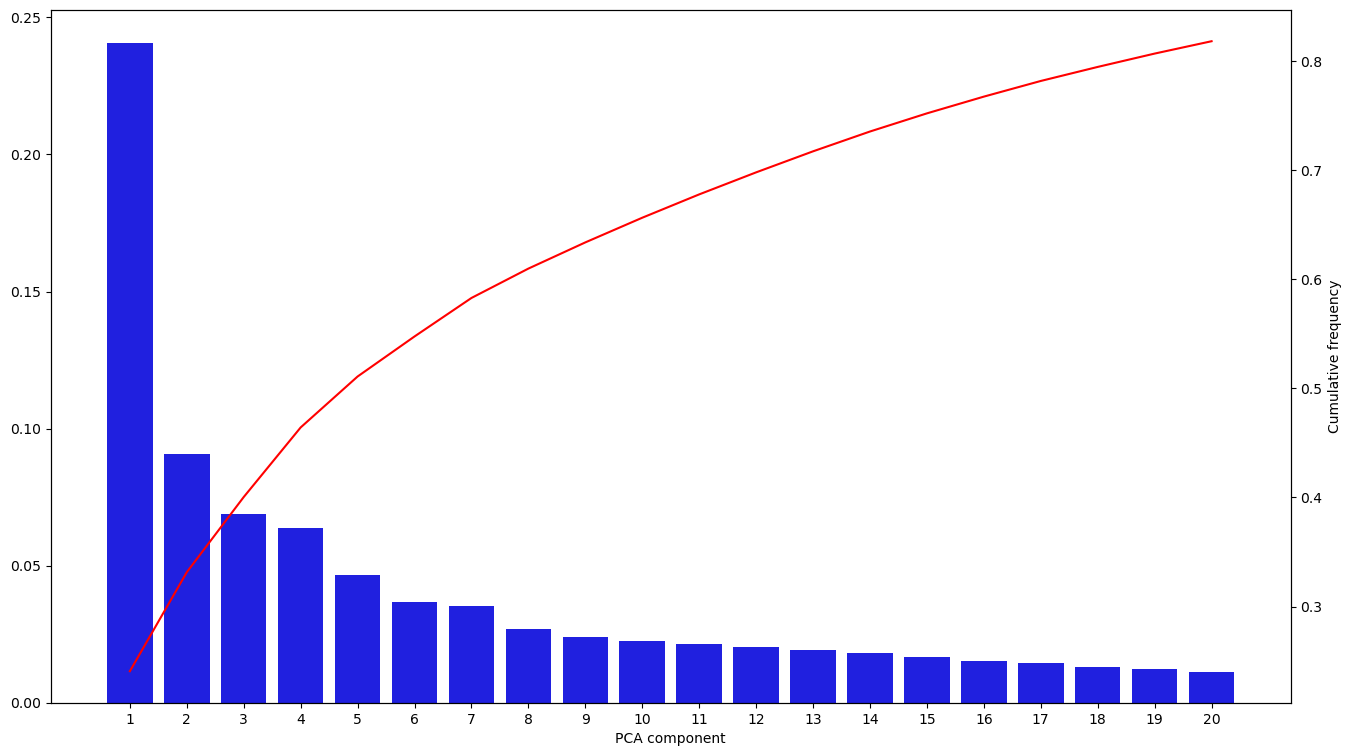

In [30]:
# The sum of the component + all previouse components
PCA_explained_cumulative = np.cumsum(PCA_model.explained_variance_ratio_)
fig = plt.figure(figsize=(16, 9)) 
ax=sns.barplot(x=list(range(1,PCA_model.n_components+1)),y=PCA_model.explained_variance_ratio_,color='blue')
plt.xlabel('PCA component')
ax2=ax.twinx() # double y-axis
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Cumulative frequency')
plot=plt.plot(PCA_explained_cumulative, c='red')

In [34]:
# Create a PCA model with 2 components (instead of the 4 features of the dataset)
PCA_model = PCA(n_components=2) # meer zou ook kunnen maar 2 is makkelijker voor overview
PCA_data = PCA_model.fit_transform(X_train_scaled)

In [51]:
le = LabelEncoder()
y = le.fit_transform(y)

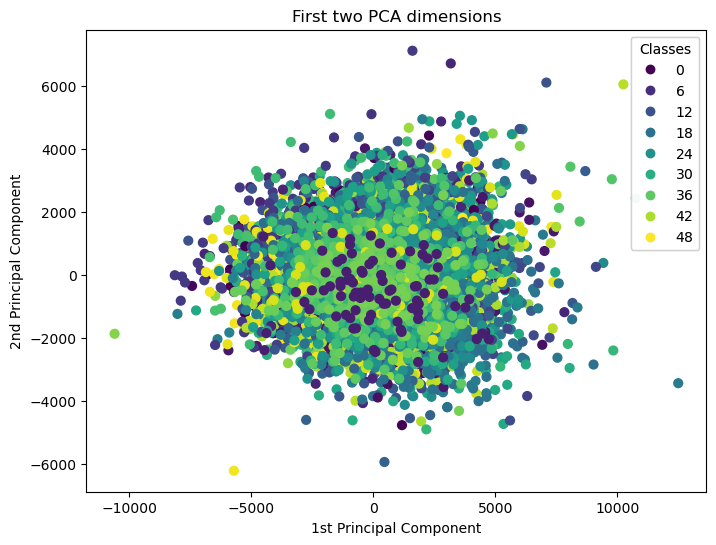

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 2D PCA
X_reduced = PCA(n_components=2).fit_transform(X)

# Label encoding for coloring
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2D Plot
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=y,
    cmap="viridis",
    s=40,
)

ax.set(
    title="First two PCA dimensions",
    xlabel="1st Principal Component",
    ylabel="2nd Principal Component",
)

# Add a legend
handles, labels = scatter.legend_elements()
legend1 = ax.legend(
    #scatter.legend_elements()[0],
    handles,
    labels,
    #y.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()



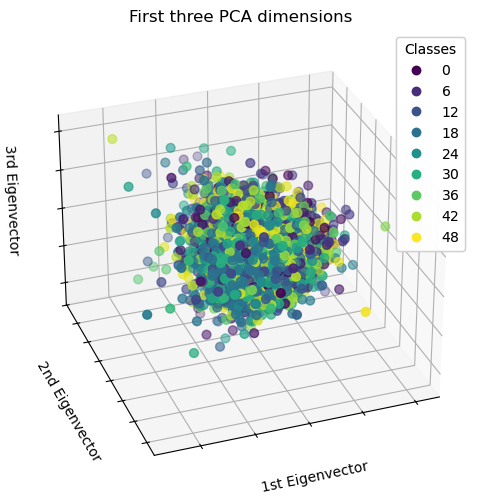

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
handles, labels = scatter.legend_elements()
legend1 = ax.legend(
    #scatter.legend_elements()[0],
    handles,
    labels,
    #y.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

## T-distributed stochastic neighbor embedding 

In [59]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)
X_embedded.shape


(15963, 2)

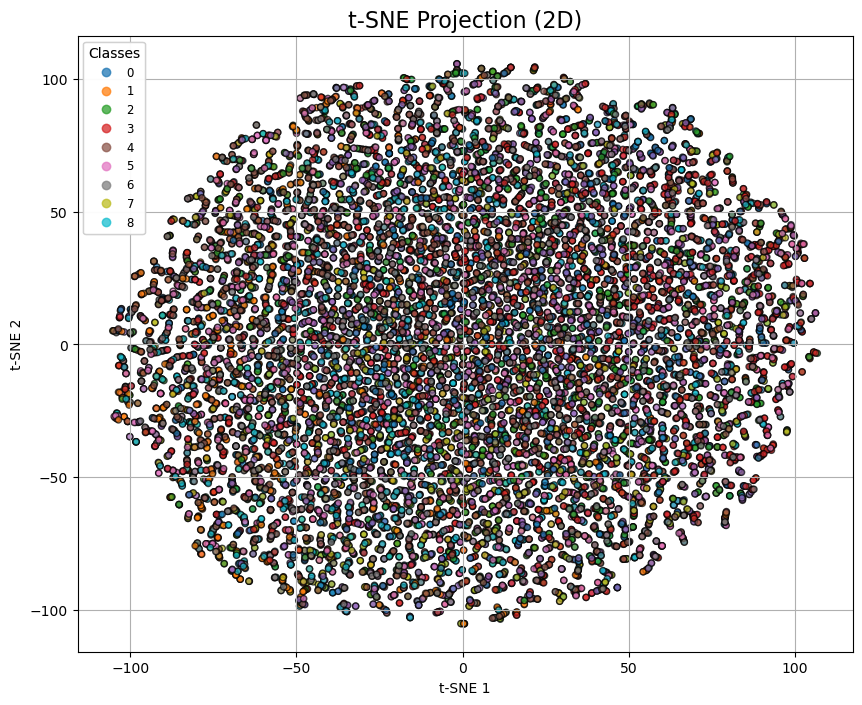

In [60]:
# Plot
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    X_embedded[:, 0],
    X_embedded[:, 1],
    c=y_encoded,
    cmap="tab10",    # nice categorical colors
    s=20,            # smaller dots than PCA
    edgecolor='k',
    alpha=0.7,
)

ax.set_title("t-SNE Projection (2D)", fontsize=16)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.grid(True)

# Legend
handles, _ = scatter.legend_elements()
legend = ax.legend(
    handles,
    le.classes_,
    title="Classes",
    loc="best",
    fontsize="small"
)
ax.add_artist(legend)

plt.show()